## King County Housing Prices Exploratory data analysis
This project shows examplary one way to generate analysis from raw data

### Data loading and looking at the feature of interest

In [1]:
# importing libraries and loading the data-set

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# these are libraries and packages needed for our model
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tools.eval_measures import rmse

# Apply the default theme
sns.set_theme()

%matplotlib inline


In [2]:
df_raw = pd.read_csv("data/King_County_House_prices_dataset.csv", delimiter=",")
df = df_raw.copy()
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [3]:
df.info()
df.describe()
df.describe(include = object) # this shows that the column sqft_basement contains non numeric values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

date sqft_basement
count       21597         21597
unique        372           304
top     6/23/2014           0.0
freq          142         12826

<Figure size 1080x1080 with 0 Axes>

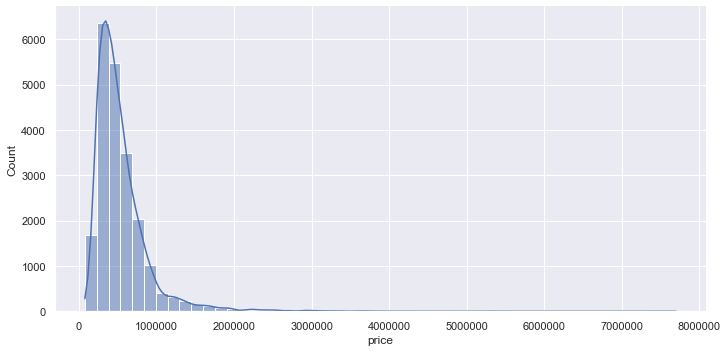

In [4]:
# take a look at the sale price and the distribution
plt.figure(figsize=(15, 15));
sns.set_style("darkgrid")
sns.despine()
sns.displot(df, x = df.price, kde = True, bins = 50, aspect = 2);
plt.ticklabel_format(style='plain', axis='x');

### Data cleaning

In [5]:
#changing date column from string to datetime

df.date = pd.to_datetime(df.date)
print(df.date.min())
print(df.date.max())

2014-05-02 00:00:00
2015-05-27 00:00:00


The timeframe of the date is only 1 year. Since we don't have any information about changing factors throughout the year (such as changing interest rates, supply of housing etc.), the exact date does not give as any information at face value.
Although one could look the months, e.g time of the year/ seasons, has an effect.

In [6]:
# Also drop the column ID, as it does not contain any relevant information
df.date = df.date.dt.month
df.rename(columns={"date": "sale_month"}, inplace = True)
del df["id"]
df.head(10)

sale_month      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0          10   221900.0         3       1.00         1180      5650     1.0   
1          12   538000.0         3       2.25         2570      7242     2.0   
2           2   180000.0         2       1.00          770     10000     1.0   
3          12   604000.0         4       3.00         1960      5000     1.0   
4           2   510000.0         3       2.00         1680      8080     1.0   
5           5  1230000.0         4       4.50         5420    101930     1.0   
6           6   257500.0         3       2.25         1715      6819     2.0   
7           1   291850.0         3       1.50         1060      9711     1.0   
8           4   229500.0         3       1.00         1780      7470     1.0   
9           3   323000.0         3       2.50         1890      6560     2.0   

   waterfront  view  condition  grade  sqft_above sqft_basement  yr_built  \
0         NaN   0.0          3      7        1180           0.0      1955   
1         0.0   0.0          3      7        2170         400.0      1951   
2         0.0   0.0          3      6         770           0.0      1933   
3         0.0   0.0          5      7        1050         910.0      1965   
4         0.0   0.0          3      8        1680           0.0      1987   
5         0.0   0.0          3     11        3890        1530.0      2001   
6         0.0   0.0          3      7        1715             ?      1995   
7         0.0   NaN          3      7        1060           0.0      1963   
8         0.0   0.0          3      7        1050         730.0      1960   
9         0.0   0.0          3      7        1890           0.0      2003   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0           0.0    98178  47.5112 -122.257           1340        5650  
1        1991.0    98125  47.7210 -122.319           1690        7639  
2           NaN    98028  47.7379 -122.233           2720        8062  
3           0.0    98136  47.5208 -122.393           1360        5000  
4           0.0    98074  47.6168 -122.045           1800        7503  
5           0.0    98053  47.6561 -122.005           4760      101930  
6           0.0    98003  47.3097 -122.327           2238        6819  
7           0.0    98198  47.4095 -122.315           1650        9711  
8           0.0    98146  47.5123 -122.337           1780        8113  
9           0.0    98038  47.3684 -122.031           2390        7570

In [7]:
# checking if any columns contain missing data
df.isnull().sum().sort_values(ascending=False)

yr_renovated     3842
waterfront       2376
view               63
sale_month          0
sqft_above          0
sqft_living15       0
long                0
lat                 0
zipcode             0
yr_built            0
sqft_basement       0
grade               0
price               0
condition           0
floors              0
sqft_lot            0
sqft_living         0
bathrooms           0
bedrooms            0
sqft_lot15          0
dtype: int64

The missing data in the columns can be replaced:
 - yr_renovated: if there was no renovation (0 or NaN), it can be assumed that the construction year was the last time major housework has been done
 - waterfront: if there is no info about the waterfront, this is as good as having no waterfront to advertise about
 - view: if there is no info about the # of views, it can be set to 0

In [8]:
# this will make the parameter yr_renovated into a binary category.abs
df.loc[df['yr_renovated'] > 0, 'yr_renovated'] = 1
df.loc[df['yr_renovated'] != 1, 'yr_renovated'] = 0
df.rename(columns={'yr_renovated' : 'renovated'}, inplace=True)
    
df.waterfront = df.waterfront.fillna(0)

df.view = df.view.fillna(0)

# also we will convert sqft_basement to numeric
df.sqft_basement = pd.to_numeric(df.sqft_basement, errors = "coerce").fillna(0)

df.isnull().sum().sort_values(ascending=False)

sale_month       0
price            0
sqft_living15    0
long             0
lat              0
zipcode          0
renovated        0
yr_built         0
sqft_basement    0
sqft_above       0
grade            0
condition        0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
bedrooms         0
sqft_lot15       0
dtype: int64

### Data exploration

Now we can look into the features and select which of them seem to correlate with the price.  
First we will look into the parameters and then use a correlation map to look at all of the parameters and select the ones, which seem to have the highest relationship with the price.


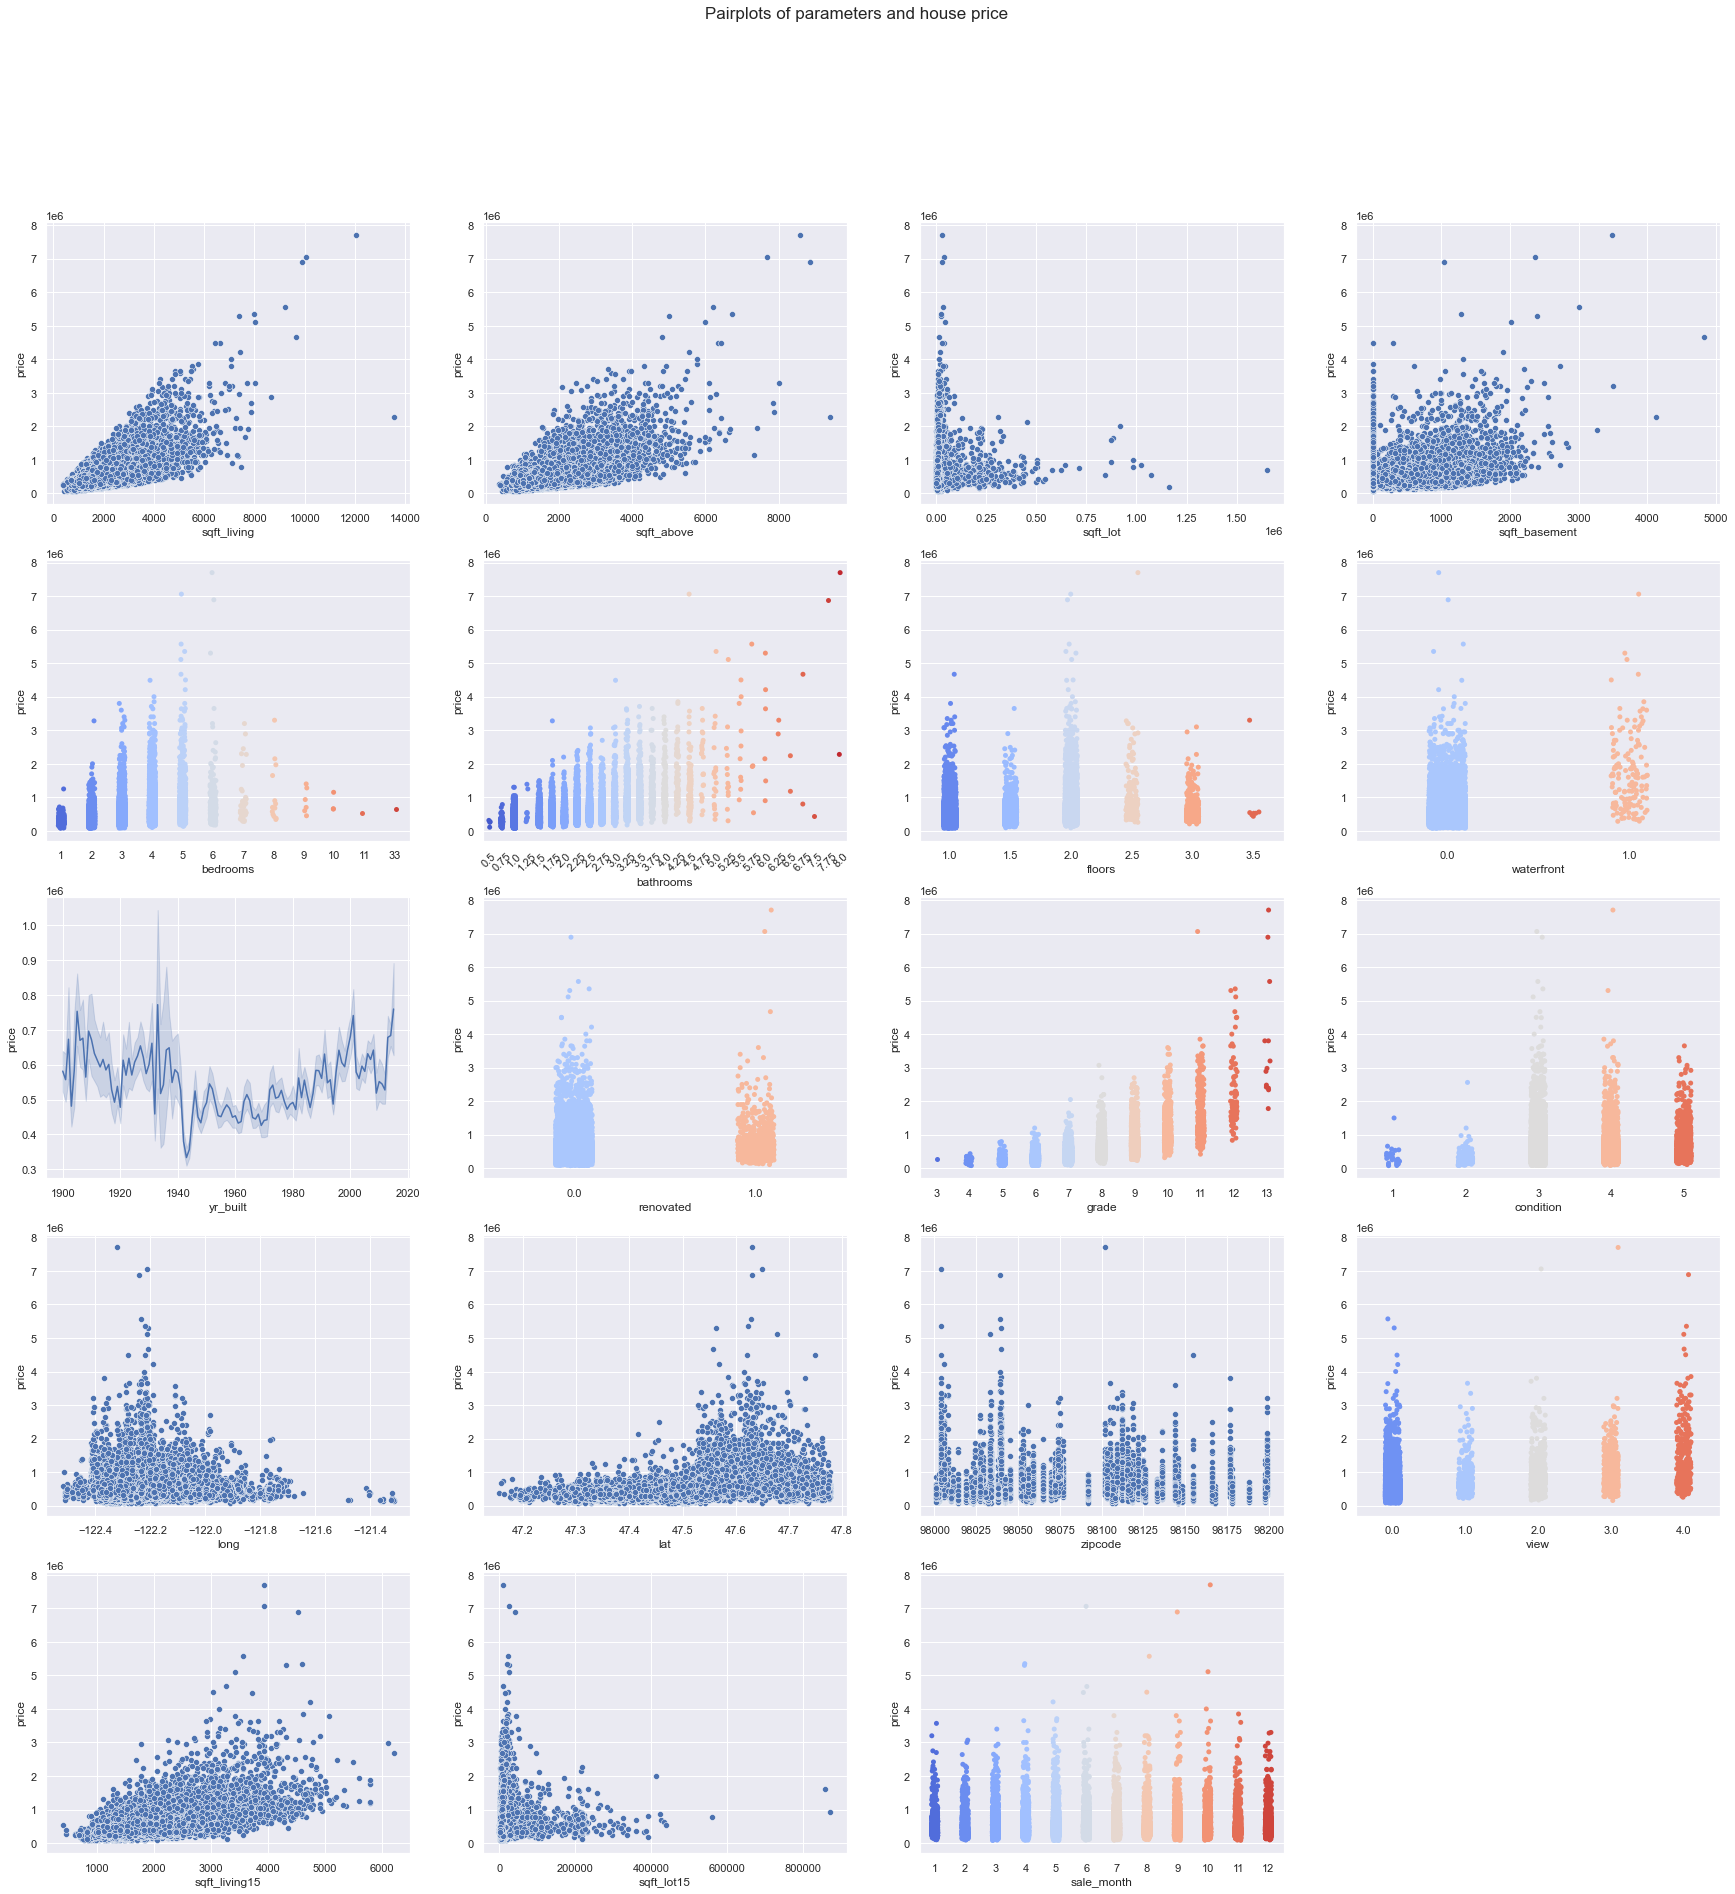

In [9]:
figure, axes = plt.subplots(5, 4, figsize=(30,30))
figure.suptitle("Pairplots of parameters and house price", fontsize=17)
sns.scatterplot(ax=axes[0, 0], data=df, x='sqft_living', y='price')
sns.scatterplot(ax=axes[0, 1], data=df, x='sqft_above', y='price')
sns.scatterplot(ax=axes[0, 3], data=df, x='sqft_basement', y='price')
sns.scatterplot(ax=axes[0, 2], data=df, x='sqft_lot', y='price')
sns.stripplot(ax=axes[1, 0], data=df, x='bedrooms', y='price', palette = "coolwarm")
sns.stripplot(ax=axes[1, 1], data=df, x='bathrooms', y='price', palette = "coolwarm")
sns.stripplot(ax=axes[1, 2], data=df, x='floors', y='price', palette = "coolwarm")
sns.stripplot(ax=axes[1, 3], data=df, x='waterfront', y='price', palette = "coolwarm")
sns.lineplot(ax=axes[2, 0], data=df, x='yr_built', y='price', palette = "coolwarm")
sns.stripplot(ax=axes[2, 1], data=df, x='renovated', y='price', palette = "coolwarm")
sns.stripplot(ax=axes[2, 2], data=df, x='grade', y='price', palette = "coolwarm")
sns.stripplot(ax=axes[2, 3], data=df, x='condition', y='price', palette = "coolwarm")
sns.scatterplot(ax=axes[3, 0], data=df, x='long', y='price')
sns.scatterplot(ax=axes[3, 1], data=df, x='lat', y='price')
sns.scatterplot(ax=axes[3, 2], data=df, x='zipcode', y='price')
sns.stripplot(ax=axes[3, 3], data=df, x='view', y='price', palette = "coolwarm")
sns.scatterplot(ax=axes[4, 0], data=df, x='sqft_living15', y='price')
sns.scatterplot(ax=axes[4, 1], data=df, x='sqft_lot15', y='price')
sns.stripplot(ax=axes[4, 2], data=df, x='sale_month', y='price', palette = "coolwarm")
plt.sca(axes[1, 1])
plt.xticks(rotation=45);
axes[4,3].set_visible(False)

Overall there are some relationships to be seen: 
- area of living, basement and above ground all carry similar linear relationship and information. We could think about only taking the living area into our analysis.  
- price seems to increase with the number of bedrooms and bathrooms until a breakpoint. Same with the condition.
- grade shows a nice proportional increase (exponential/ polynomial?)
- number of floor, absence of renovation or waterfront, the number of views and the sale month, do not seem to show a relationship
- building year is interesting as the prices start to drop during the era of post 2. WW and then increase again at around the 80s (polynomial effect?)
- while longitude does seem to be randomly distributed, latitude shows a left skew. 
- Zipcode has an obvious effect, since some zipcodes have more occurences of higher priced houses while others stay "together"
- living and lot area of the 15 nearest neighbors show similar distribution as the sole living and lot area

There seem to be couple of outliers in the plot with the number of bedrooms. Also the house with the largest sqft_living seems off. It has by large the biggest living area but is comparably cheap.

In [10]:
df.sort_values("bedrooms", ascending= False).head(10)

sale_month      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
15856           6   640000.0        33       1.75         1620      6000   
8748            8   520000.0        11       3.00         3000      4960   
13301           8  1150000.0        10       5.25         4590     10920   
19239          12   660000.0        10       3.00         2920      3745   
15147          10   650000.0        10       2.00         3610     11914   
6073            8  1280000.0         9       4.50         3650      5000   
4231            1   700000.0         9       3.00         3680      4400   
16830           3  1400000.0         9       4.00         4620      5508   
8537            8   450000.0         9       7.50         4050      6504   
4092            5   599999.0         9       4.50         3830      6988   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
15856     1.0         0.0   0.0          5      7        1040          580.0   
8748      2.0         0.0   0.0          3      7        2400          600.0   
13301     1.0         0.0   2.0          3      9        2500         2090.0   
19239     2.0         0.0   0.0          4      7        1860         1060.0   
15147     2.0         0.0   0.0          4      7        3010          600.0   
6073      2.0         0.0   0.0          3      8        2530         1120.0   
4231      2.0         0.0   0.0          3      7        2830          850.0   
16830     2.5         0.0   0.0          3     11        3870          750.0   
8537      2.0         0.0   0.0          3      7        4050            0.0   
4092      2.5         0.0   0.0          3      7        2450         1380.0   

       yr_built  renovated  zipcode      lat     long  sqft_living15  \
15856      1947        0.0    98103  47.6878 -122.331           1330   
8748       1918        1.0    98106  47.5560 -122.363           1420   
13301      2008        0.0    98004  47.5861 -122.113           2730   
19239      1913        0.0    98105  47.6635 -122.320           1810   
15147      1958        0.0    98006  47.5705 -122.175           2040   
6073       1915        1.0    98105  47.6604 -122.289           2510   
4231       1908        0.0    98102  47.6374 -122.324           1960   
16830      1915        0.0    98105  47.6684 -122.309           2710   
8537       1996        0.0    98144  47.5923 -122.301           1448   
4092       1938        0.0    98103  47.6927 -122.338           1460   

       sqft_lot15  
15856        4700  
8748         4960  
13301       10400  
19239        3745  
15147       11914  
6073         5000  
4231         2450  
16830        4320  
8537         3866  
4092         6291

In [11]:
df.sort_values("sqft_living", ascending = False).head(5)

sale_month      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
12764           5  2280000.0         7       8.00        13540    307752   
7245           10  7700000.0         6       8.00        12050     27600   
3910            6  7060000.0         5       4.50        10040     37325   
9245            9  6890000.0         6       7.75         9890     31374   
8085            6  4670000.0         5       6.75         9640     13068   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
12764     3.0         0.0   4.0          3     12        9410         4130.0   
7245      2.5         0.0   3.0          4     13        8570         3480.0   
3910      2.0         1.0   2.0          3     11        7680         2360.0   
9245      2.0         0.0   4.0          3     13        8860         1030.0   
8085      1.0         1.0   4.0          3     12        4820         4820.0   

       yr_built  renovated  zipcode      lat     long  sqft_living15  \
12764      1999        0.0    98053  47.6675 -121.986           4850   
7245       1910        1.0    98102  47.6298 -122.323           3940   
3910       1940        1.0    98004  47.6500 -122.214           3930   
9245       2001        0.0    98039  47.6305 -122.240           4540   
8085       1983        1.0    98040  47.5570 -122.210           3270   

       sqft_lot15  
12764      217800  
7245         8800  
3910        25449  
9245        42730  
8085        10454

The houses with 33 and 11 bedrooms, and the 10 bedroom house under 3000 sqft seem suspicious. Over 10 bedrooms at under 300 m2 does not seem realistic.  
Also the 7 bedroom house with the large living area was sold for approx. a third of other similar listings (area, condition etc.).  
These seem to be an error and the listings will be dropped. 

In [12]:
df.drop(index=[15856, 8748, 19239, 12764], inplace = True)

In addition, there are lots of houses with large living areas and lot areas. These listing could be outside of the normal scope of a regular house sell in King County.  
We can filter the biggest outlierst with the IQR method.  
Data points that falls outside of 1.5 times of an Interquartile range above the 3rd quartile (Q3) and below the 1st quartile (Q1) will be dropped.

In [13]:
def iqr_outliers(column):
    Q1,Q3 = np.percentile(column , [25,75])
    iqr = Q3 - Q1
    lower_range = Q1 - (1.6 * iqr)
    upper_range = Q3 + (1.6 * iqr)
    return lower_range,upper_range

#applying the function to our columns sqft_living and sqft_lot
lotlower,lotupper = iqr_outliers(df.sqft_lot)
sqftlower, sqftupper = iqr_outliers(df.sqft_living)

#dropping the outliers
df.drop(df[ (df.sqft_lot > lotupper) | (df.sqft_lot < lotlower) ].index , inplace=True)
df.drop(df[ (df.sqft_living > sqftupper) | (df.sqft_living < sqftlower) ].index , inplace=True)

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

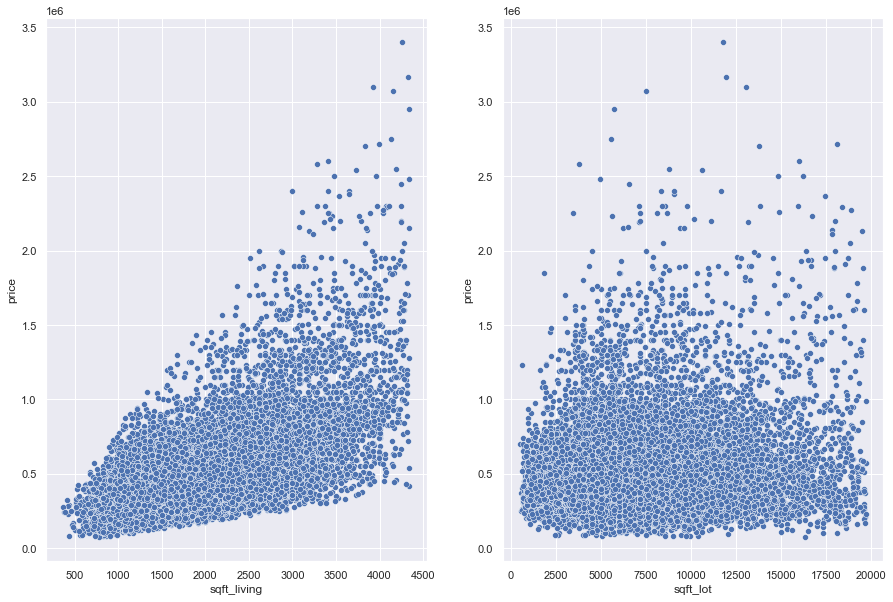

In [14]:
figure, axes = plt.subplots(1, 2, figsize=(15,10))
sns.scatterplot(ax=axes[0], data=df, x='sqft_living', y='price')
sns.scatterplot(ax=axes[1], data=df, x='sqft_lot', y='price')

This does look cleaner.

### Location and Zip-code

Geographical location and the zip-code seemed to have an effect on the price. We will look into the distribution of the houses and their surroundings to get a better grasp of the data.

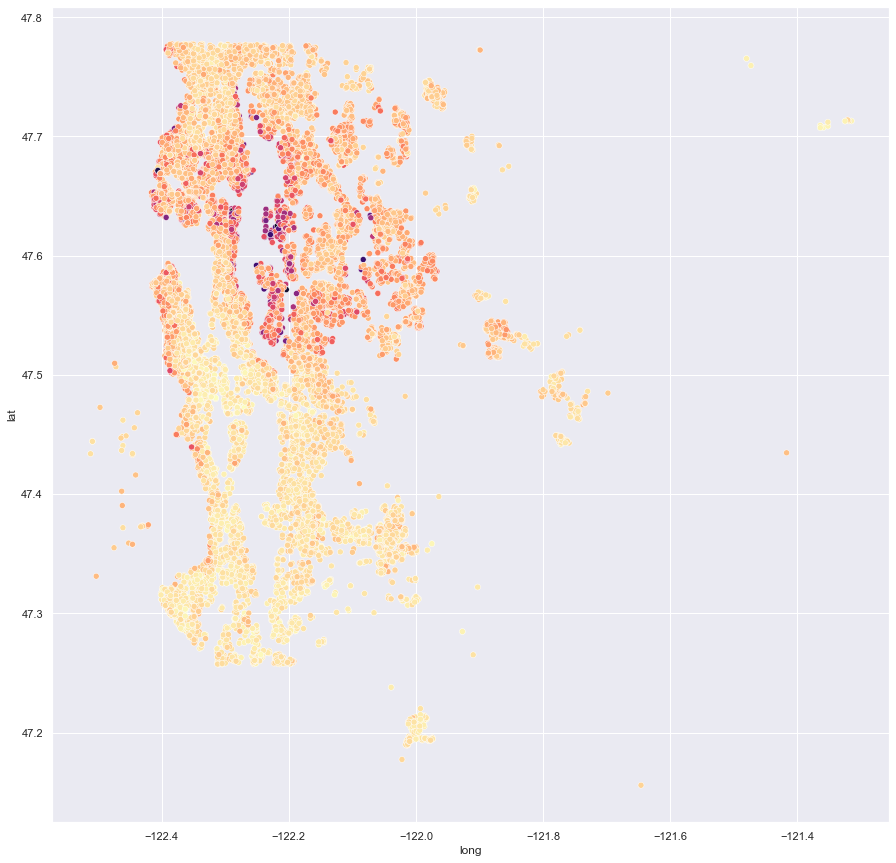

In [15]:
# first we will look into the coordinates of each house for geographical distribution
plt.figure(figsize=(15,15))
sns.set_style("darkgrid")
ax = sns.scatterplot(data = df, x = "long", y = "lat", hue = "price", palette = "magma_r");
ax.get_legend().remove()

We can see that there are a couple of houses in our dataset, which are not really inside the center of the region. We could leave this houses out.

In [16]:
# dropping houses east of King County
df.drop(df[df['long'] > -121.7].index, inplace = True)

df.describe()

sale_month         price      bedrooms     bathrooms   sqft_living  \
count  18955.000000  1.895500e+04  18955.000000  18955.000000  18955.000000   
mean       6.566711  5.019999e+05      3.331891      2.055513   1952.556001   
std        3.121171  2.821356e+05      0.885114      0.717836    752.003683   
min        1.000000  7.800000e+04      1.000000      0.500000    370.000000   
25%        4.000000  3.130500e+05      3.000000      1.500000   1390.000000   
50%        6.000000  4.350000e+05      3.000000      2.000000   1830.000000   
75%        9.000000  6.120000e+05      4.000000      2.500000   2410.000000   
max       12.000000  3.400000e+06     10.000000      7.500000   4340.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  18955.000000  18955.000000  18955.000000  18955.000000  18955.000000   
mean    7362.102453      1.484674      0.003746      0.192878      3.413558   
std     3640.562557      0.544249      0.061089      0.688425      0.652392   
min      520.000000      1.000000      0.000000      0.000000      1.000000   
25%     4871.000000      1.000000      0.000000      0.000000      3.000000   
50%     7200.000000      1.000000      0.000000      0.000000      3.000000   
75%     9375.000000      2.000000      0.000000      0.000000      4.000000   
max    19709.000000      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built     renovated  \
count  18955.000000  18955.000000   18955.000000  18955.000000  18955.000000   
mean       7.533949   1679.561382     267.565233   1970.035083      0.032604   
std        1.038941    700.313511     403.600121     30.034304      0.177601   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1160.000000       0.000000   1950.000000      0.000000   
50%        7.000000   1500.000000       0.000000   1972.000000      0.000000   
75%        8.000000   2060.000000     520.000000   1997.000000      0.000000   
max       12.000000   4340.000000    2240.000000   2015.000000      1.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  18955.000000  18955.000000  18955.000000   18955.000000   18955.000000  
mean   98081.229333     47.562129   -122.228869    1898.171564    7370.122923  
std       54.060434      0.136521      0.130645     609.628969    4449.880279  
min    98001.000000     47.177500   -122.512000     460.000000     651.000000  
25%    98033.000000     47.479200   -122.336000    1450.000000    5000.000000  
50%    98074.000000     47.573400   -122.265000    1770.000000    7215.000000  
75%    98118.000000     47.678800   -122.152000    2240.000000    9030.000000  
max    98199.000000     47.777600   -121.730000    5790.000000  196591.000000

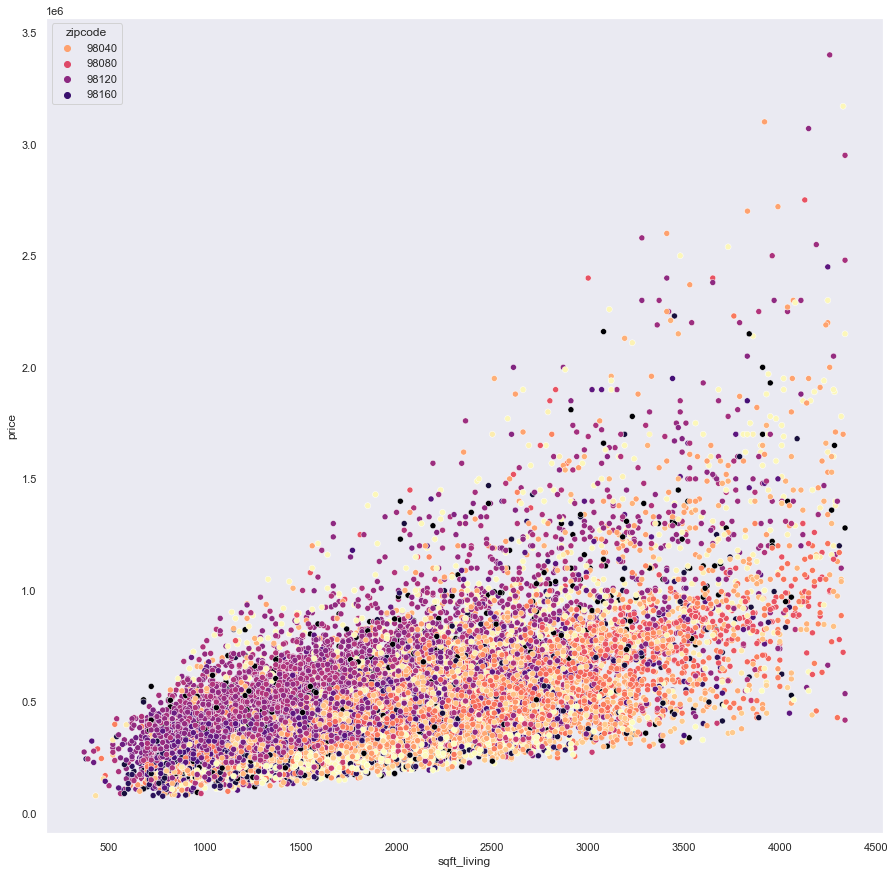

In [17]:
# since the location seems to be important, the zip codes will be analyzed
plt.figure(figsize=(15,15));
sns.set_style("dark")
sns.scatterplot(x = "sqft_living", y = "price", hue = "zipcode", data = df, palette = "magma_r");

This map is very convoluted, and there does not seem to be any information to be gained, besides seeing some outliers.
We could however try to rank the zip-codes against each other by their median price

In [18]:
zipsorted = pd.DataFrame(df.groupby("zipcode")["price"].median().sort_values(ascending = True))
zipsorted["rank"] = np.arange(len(zipsorted))+1

# a function to take a line from dataframe x, compare it to the index of another frame and returns the value of the column at that position
def make_group(x, frame, column):
    y = frame.loc[(frame.index == x)][column]
    z = np.array(y)
    z[0]
    return z[0]
df["zip_rank"] = df.zipcode.apply( lambda x: make_group(x, zipsorted, "rank"))
df.head()

sale_month     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0          10  221900.0         3       1.00         1180      5650     1.0   
1          12  538000.0         3       2.25         2570      7242     2.0   
2           2  180000.0         2       1.00          770     10000     1.0   
3          12  604000.0         4       3.00         1960      5000     1.0   
4           2  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  sqft_above  sqft_basement  yr_built  \
0         0.0   0.0          3  ...        1180            0.0      1955   
1         0.0   0.0          3  ...        2170          400.0      1951   
2         0.0   0.0          3  ...         770            0.0      1933   
3         0.0   0.0          5  ...        1050          910.0      1965   
4         0.0   0.0          3  ...        1680            0.0      1987   

   renovated  zipcode      lat     long  sqft_living15  sqft_lot15  zip_rank  
0        0.0    98178  47.5112 -122.257           1340        5650        12  
1        1.0    98125  47.7210 -122.319           1690        7639        35  
2        0.0    98028  47.7379 -122.233           2720        8062        36  
3        0.0    98136  47.5208 -122.393           1360        5000        42  
4        0.0    98074  47.6168 -122.045           1800        7503        57  

[5 rows x 21 columns]

In [21]:
df.price.max()

3400000.0

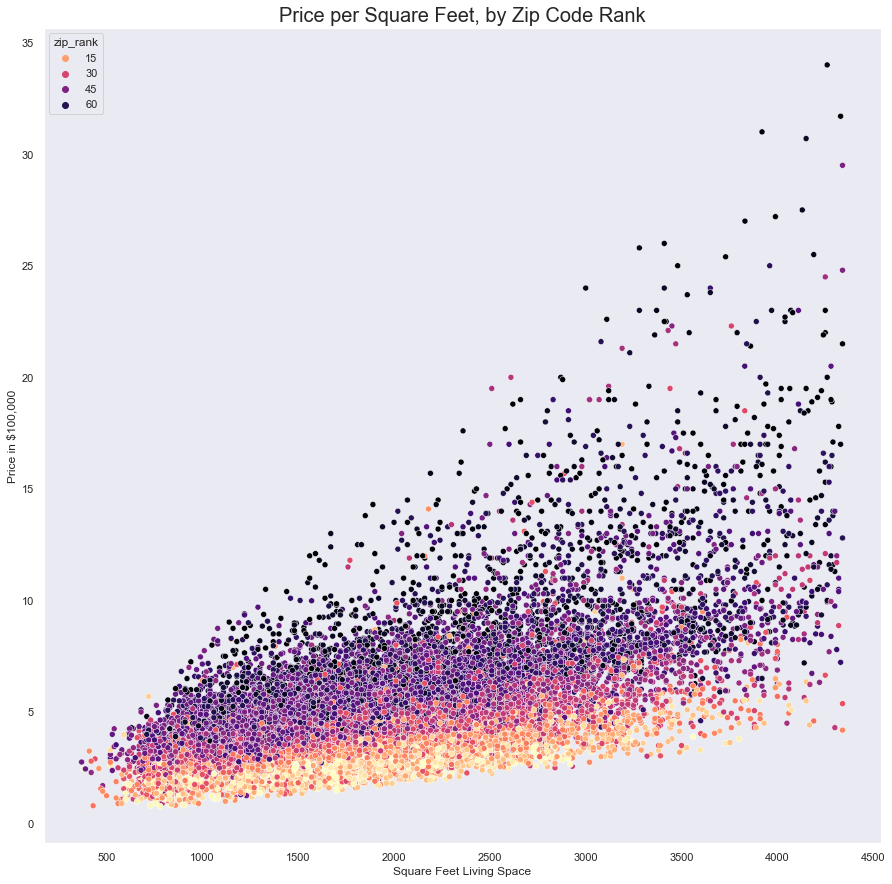

In [21]:
plt.figure(figsize=(15,15));
fig = sns.scatterplot(data = df, x = df.sqft_living, y = df.price/100000, hue = df.zip_rank, 
                      palette = "magma_r")
fig.set_xlabel('Square Feet Living Space', fontsize=12)
fig.set_ylabel('Price in $100,000', fontsize=12)
fig.set_title('Price per Square Feet, by Zip Code Rank', fontsize=20);

The price per sqr ft living space, color-coded in the zip-code median rank shows, that most of the houses seem to have a linear relationship with its rank and living space, but the points also start to disperse.

### Correlation matrix

Now after doing some data cleaning, we take a look at all the parameters for correlations with our sale prices

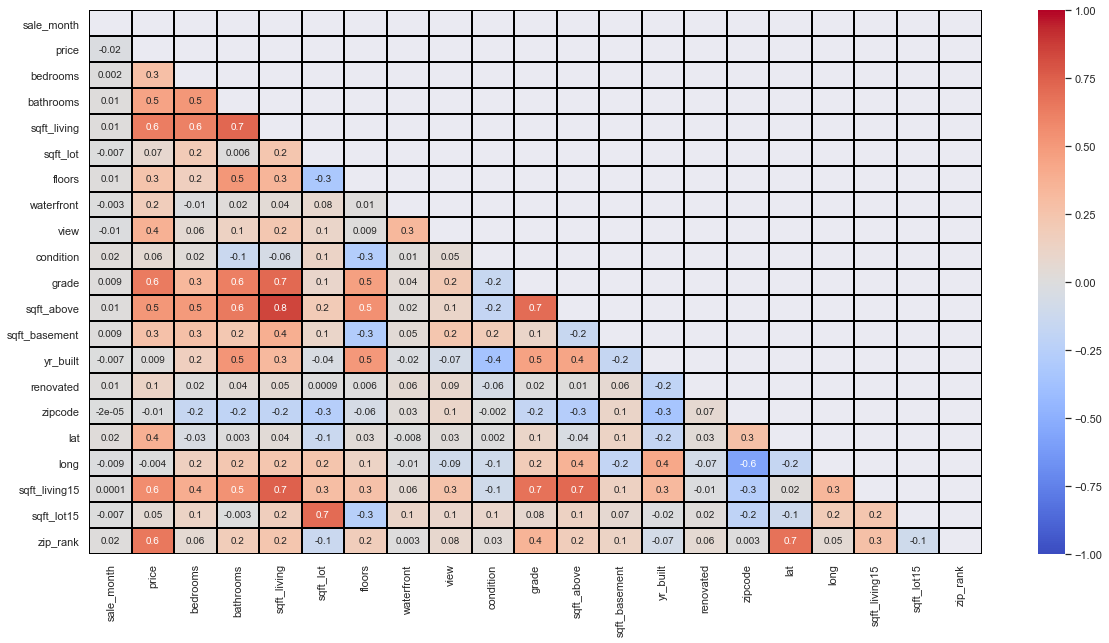

In [22]:
plt.figure(figsize=(20,10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool)) #this creates a mask for the upper triangle of the heatmap
sns.heatmap(df.corr(), annot = True, mask = mask,
            cmap = "coolwarm", vmin = -1, vmax = 1, 
            center = 0, fmt = ".1g",
            linewidths=2, linecolor='black');



In [23]:
df.corr()['price'].sort_values(ascending = False).head(11)

price            1.000000
zip_rank         0.649815
grade            0.636563
sqft_living      0.628949
sqft_living15    0.557587
sqft_above       0.515431
bathrooms        0.450062
lat              0.376071
view             0.371296
bedrooms         0.285960
sqft_basement    0.272983
Name: price, dtype: float64

These are the top 10 parameters showing a correlation with the sale price.  
There were no negatively correlating one above 0.05, so we will ignore negative correlation.  
Also as mentioned above, sqft_living, sqft_above and sqft_basement more or less describe the area of the house. So we will just use living area in our analysis.
The same goes for zip_rank and latitude.

We will concentrate on the following for further analysis:
- sqft_living
- grade
- sqft_living15
- zip_rank
- bathrooms
- view
- bedrooms

In [24]:
cols = ["sqft_living", "grade", "sqft_living15", "zip_rank", "bathrooms", "view", "bedrooms"]
cols

['sqft_living',
 'grade',
 'sqft_living15',
 'zip_rank',
 'bathrooms',
 'view',
 'bedrooms']

### Looking into the target variable and distribution

/Users/bur.oez/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


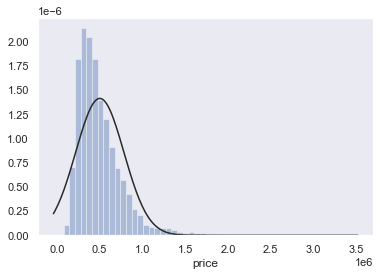

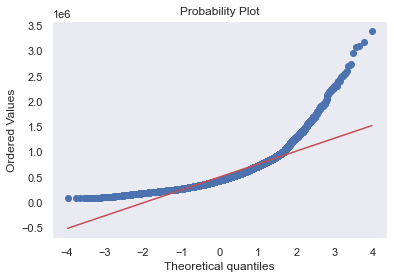

In [25]:
# distribution histogram and probability plot
sns.distplot(df.price, fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df.price, plot=plt)

The plots show a right skew and a high peak. To improve normality of distribution, we can take the log.

/Users/bur.oez/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


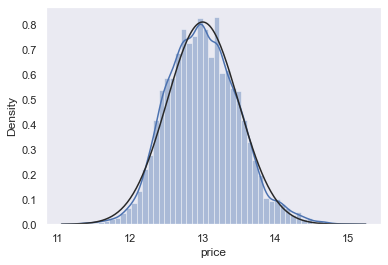

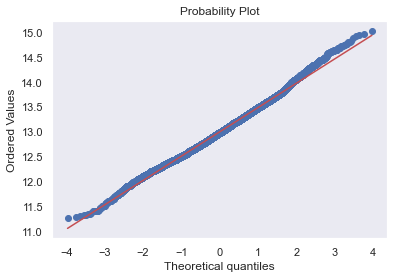

In [26]:
# log transform our target price to improve normality of distribution
df_target_log = np.log(df['price'])

#histogram and normal probability plot
sns.distplot(df_target_log, fit=norm);
fig = plt.figure()
res = stats.probplot(df_target_log, plot=plt)

Much better, but still some skewdness in the higher end. We will leave it at that right now.

### Building the models

Our objective after data cleaning and feature analysis is to build a model, which can predict the prices of a given home.  
For this we will first devide our data into a train and test set.

In [27]:
# setting the random state
randomstate = 3

y = pd.DataFrame(df['price'])
x = df[cols]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=randomstate)

In [28]:
predictors_int = sm.add_constant(x_train)
modelOLS = sm.OLS(y_train, predictors_int).fit()
modelOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     5481.
Date:                Mon, 07 Jun 2021   Prob (F-statistic):               0.00
Time:                        11:36:39   Log-Likelihood:            -1.8927e+05
No. Observations:               14216   AIC:                         3.786e+05
Df Residuals:                   14208   BIC:                         3.786e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.583e+05   1.15e+04    -31.137      0.000   -3.81e+05   -3.36e+05
sqft_living     151.8286      3.463     43.847      0.000     145.041     158.616
grade          4.964e+04   1912.001     25.965      0.000    4.59e+04    5.34e+04
sqft_living15   -10.0896      3.213     -3.140      0.002     -16.388      -3.791
zip_rank       7283.9669     70.423    103.432      0.000    7145.929    7422.005
bathrooms     -1.986e+04   2577.960     -7.703      0.000   -2.49e+04   -1.48e+04
view            8.72e+04   1851.836     47.087      0.000    8.36e+04    9.08e+04
bedrooms      -9716.1906   1848.768     -5.255      0.000   -1.33e+04   -6092.364
==============================================================================
Omnibus:                     8530.229   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           165309.145
Skew:                           2.520   Prob(JB):                         0.00
Kurtosis:                      18.927   Cond. No.                     2.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our selected features only show a R2 value of 0.73  
There seem to be features left out. Next we will use another linear regression to check for all paramaters

In [29]:
X = df.drop("price", axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=randomstate)

model2 = LinearRegression()
model2.fit(x_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
model2.score(x_test, y_test)

0.7546997857822861

This is only marginally better. A third method will just look at the top 3 parameters of square footage, zip code rank and grade of materials. Using all of the features, we can only achieve 

In [38]:
col = ["sqft_living", "grade", "zip_rank"]
xs = df[col]
x_train, x_test, y_train, y_test = train_test_split(xs, y, random_state=randomstate)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(model.score(x_test, y_test))
print("MAE: {}".format(np.abs(y_test-y_pred).mean()))
print("RMSE: {}".format(np.sqrt(((y_test-y_pred)**2).mean())))

0.6676819929269213
MAE: price    102243.35192
dtype: float64
RMSE: price    163126.572232
dtype: float64


These 3 parameters are responsible for 66% of the variance in the price,  which is 87% of featuring all the parameters.  
But still our root-mean-square error is 163126.57.
This score could be further improved:
- there seems to be a strong multicollinearity of the variables
- using another method to catch potential non linear relationships


### Summary

The primary factors influencing housing prices in the King County metro area are:
- square footage
- quality of materials used
- the location 

There is an upward price trend with both increased square footage and materials grade. The lower bound of data points is very linear, but with increased squared footage there is a higher variance.  
Through ranking the zipcodes by median home value, the attactivity of zipcodes can be shown.
Low median zip codes have a low price per square footage, and price per square foot increases with zip code median.  
Most zip codes exhibit a clear trend of price per square foot decreasing with increased total square footage, which is entirely normal, certain very high value zip codes seem to retain their high price per square foot regardless of total square footage.  
The highest value sales, are clustered in and around Seattle to the west of Lake Washington and into the eastern lake cities such as Redmond which are the tech industry hubs.

### Visualization

In [23]:
# make simpler variables for our visualiation variables
viz_df = df[['price', 'sqft_living', 'zip_rank', 'grade']]
viz_df['pr_sf'] = round(viz_df['price']/viz_df['sqft_living'], 2)

viz_price = viz_df['price']/100000
viz_sqft = viz_df['sqft_living']
viz_grade = viz_df['grade']
viz_zip = viz_df['zip_rank']
viz_pr_sf = viz_df['pr_sf']
viz_df

<ipython-input-23-af26812ae835>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viz_df['pr_sf'] = round(viz_df['price']/viz_df['sqft_living'], 2)


price  sqft_living  zip_rank  grade   pr_sf
0      221900.0         1180        12      7  188.05
1      538000.0         2570        35      7  209.34
2      180000.0          770        36      6  233.77
3      604000.0         1960        42      7  308.16
4      510000.0         1680        57      8  303.57
...         ...          ...       ...    ...     ...
21592  360000.0         1530        49      8  235.29
21593  400000.0         2310        17      8  173.16
21594  402101.0         1020        39      7  394.22
21595  400000.0         1600        54      8  250.00
21596  325000.0         1020        39      7  318.63

[18955 rows x 5 columns]

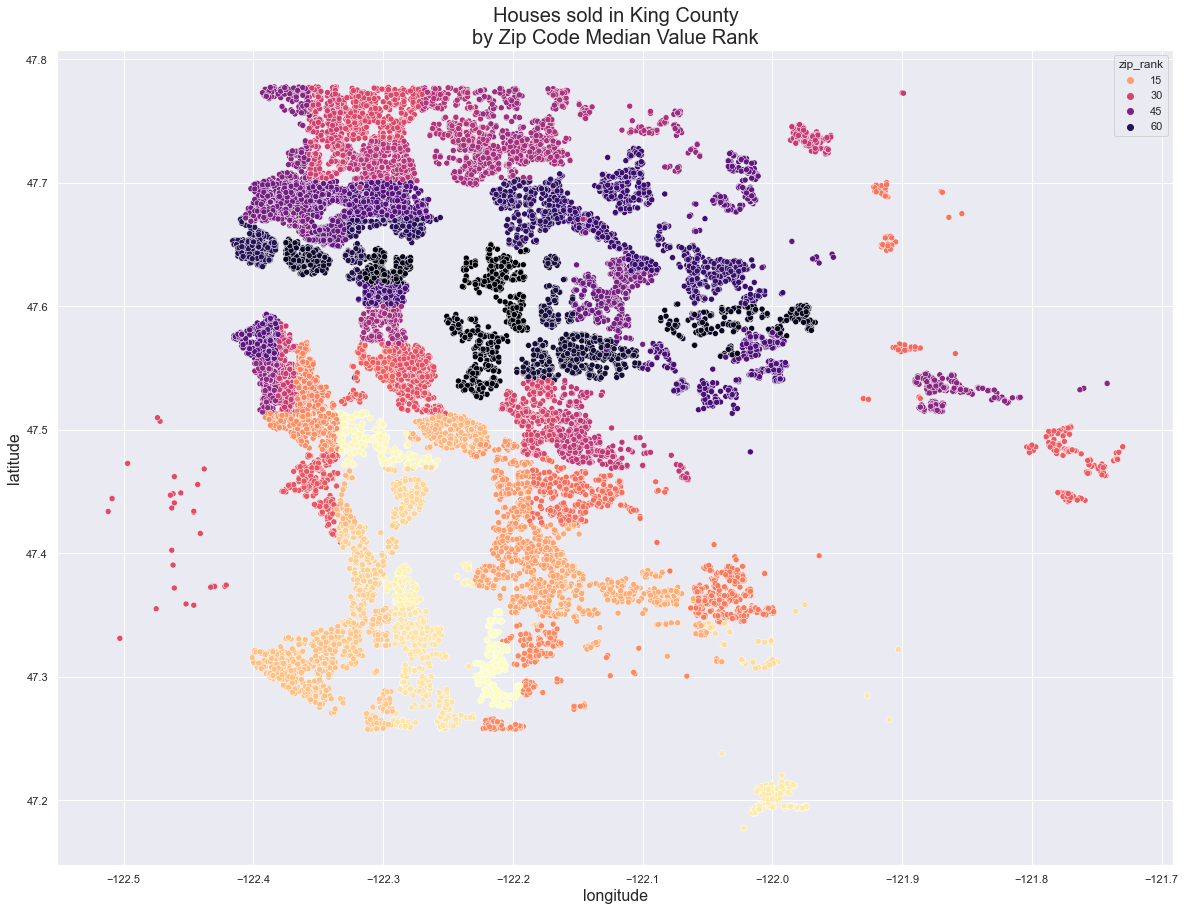

In [59]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.scatterplot(data = df, x = "long", y ="lat", hue = viz_zip, palette ="magma_r");
ax.set_xlabel('longitude', fontsize=16)
ax.set_ylabel('latitude', fontsize=16)
ax.set_title("Houses sold in King County\nby Zip Code Median Value Rank", fontsize=20);
plt.savefig('map_ziprank.png');

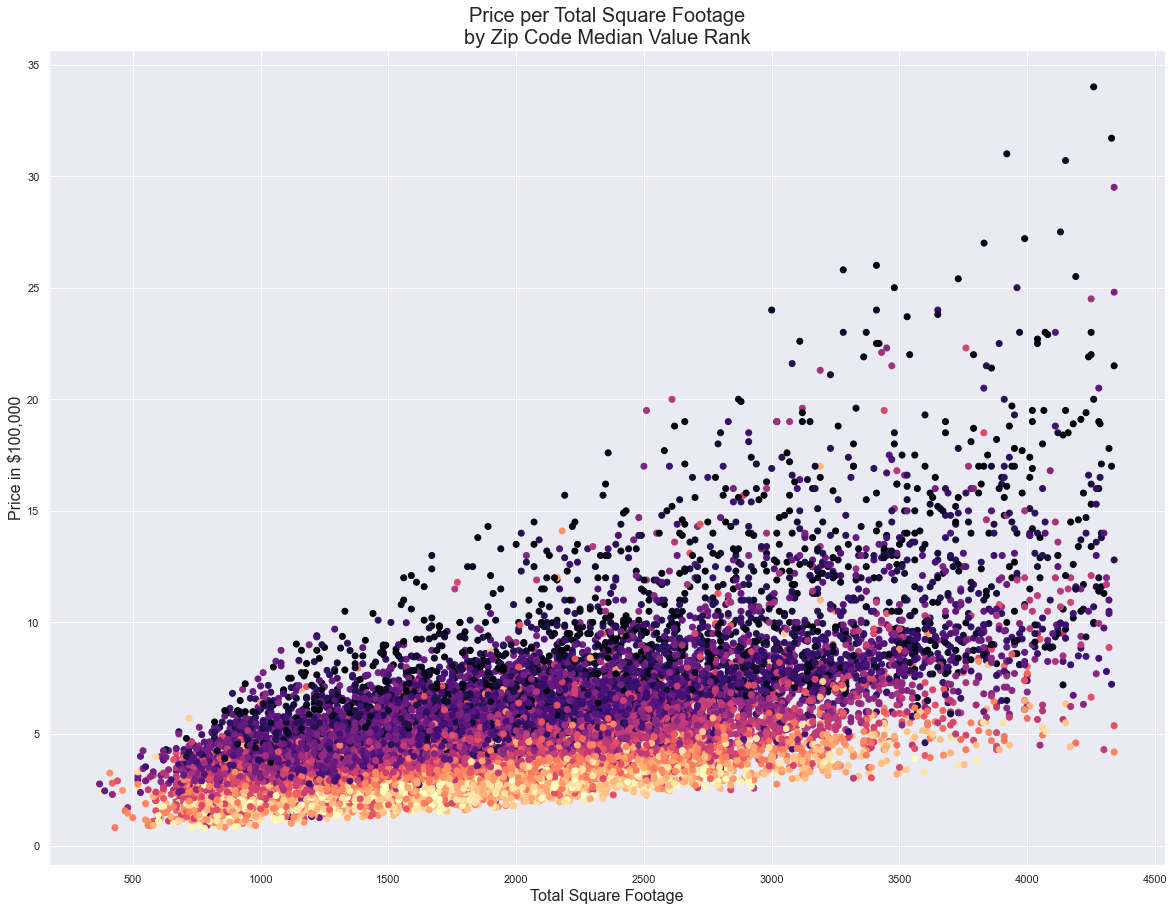

In [58]:
# prepare figure
fig, ax = plt.subplots(figsize=(20, 15))

#scatter our data
ax.scatter(viz_sqft, viz_price, c=viz_zip, cmap='magma_r')

# label our axes and title
ax.set_xlabel('Total Square Footage', fontsize=16)
ax.set_ylabel('Price in $100,000', fontsize=16)
ax.set_title("Price per Total Square Footage\nby Zip Code Median Value Rank", fontsize=20);

# save visualization to png
plt.savefig('price_per_sqfootage_ziprank.png');

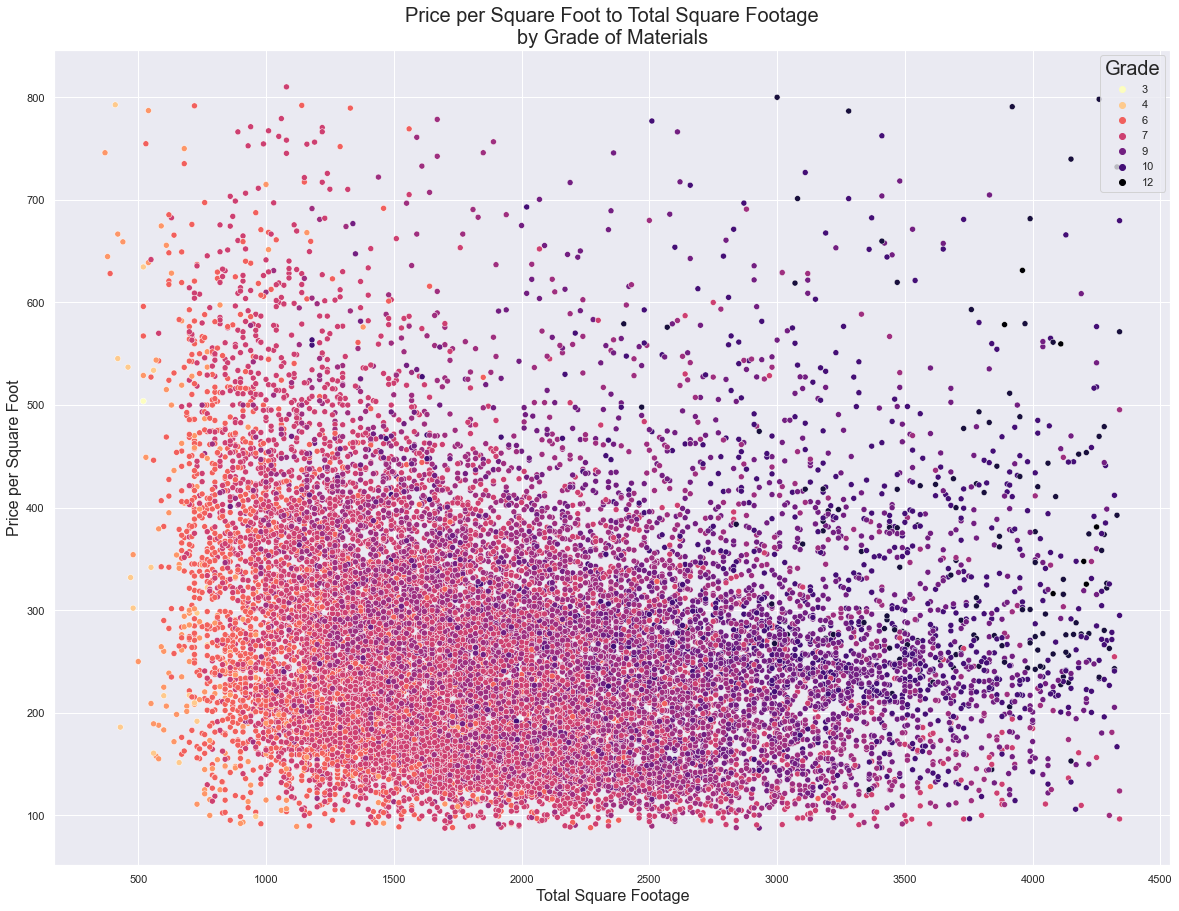

In [64]:
fig, ax = plt.subplots(figsize=(20, 15))

ax = sns.scatterplot(x = viz_sqft, y = viz_pr_sf, data=viz_df, hue='grade', palette='magma_r')

# label axes and title
ax.set_xlabel('Total Square Footage', fontsize=16)
ax.set_ylabel('Price per Square Foot', fontsize=16)
ax.set_title("Price per Square Foot to Total Square Footage\nby Grade of Materials", fontsize=20)

# label and position our legend
plt.legend(title='Grade', loc='upper right', title_fontsize=20);

# save visualization to png
plt.savefig('price_persqft_grade');

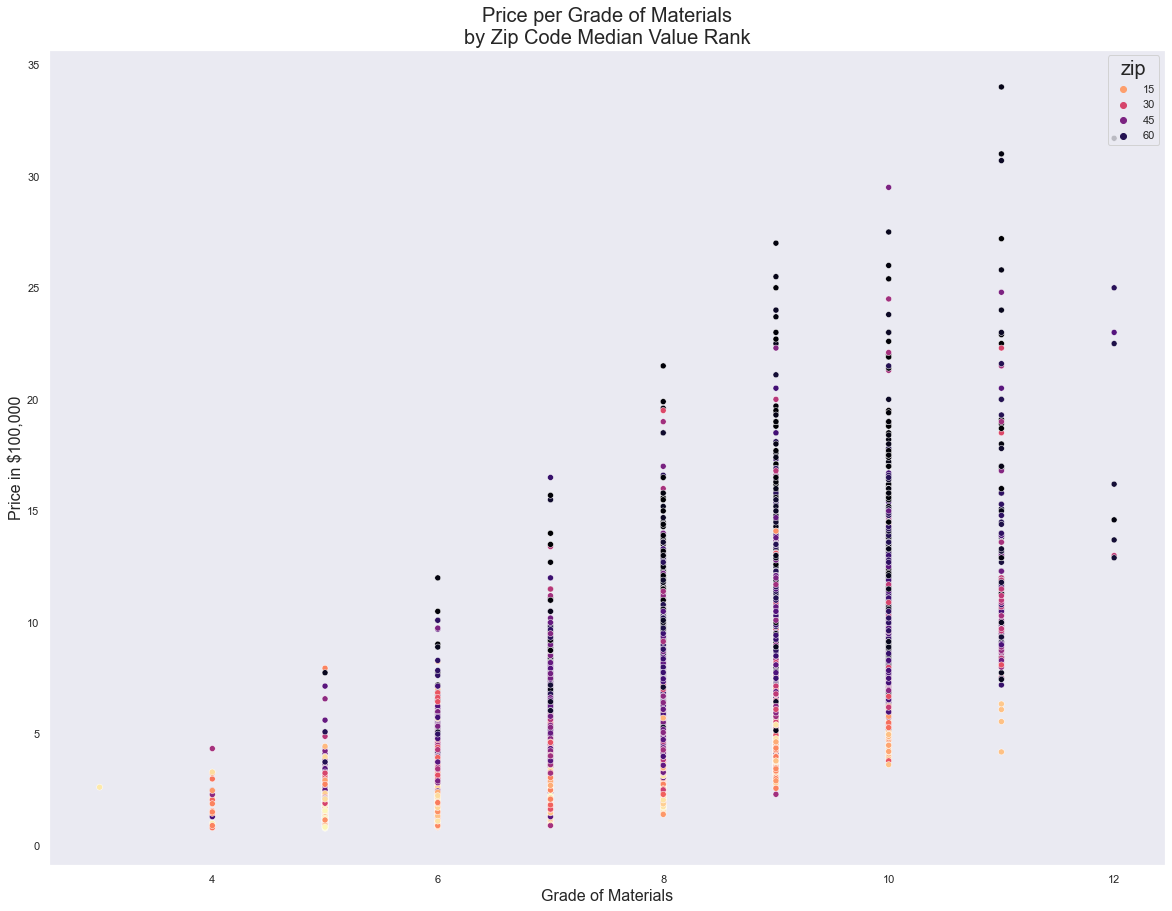

In [24]:
fig, ax = plt.subplots(figsize=(20, 15))

ax = sns.scatterplot(x = viz_grade, y = viz_price, data=viz_df, hue='zip_rank', palette='magma_r')

# label axes and title
ax.set_xlabel('Grade of Materials', fontsize=16)
ax.set_ylabel('Price in $100,000', fontsize=16)
ax.set_title("Price per Grade of Materials\nby Zip Code Median Value Rank", fontsize=20);

# label and position our legend
plt.legend(title='zip', loc='upper right', title_fontsize=20);

# save visualization to png
plt.savefig('price_per_grade');

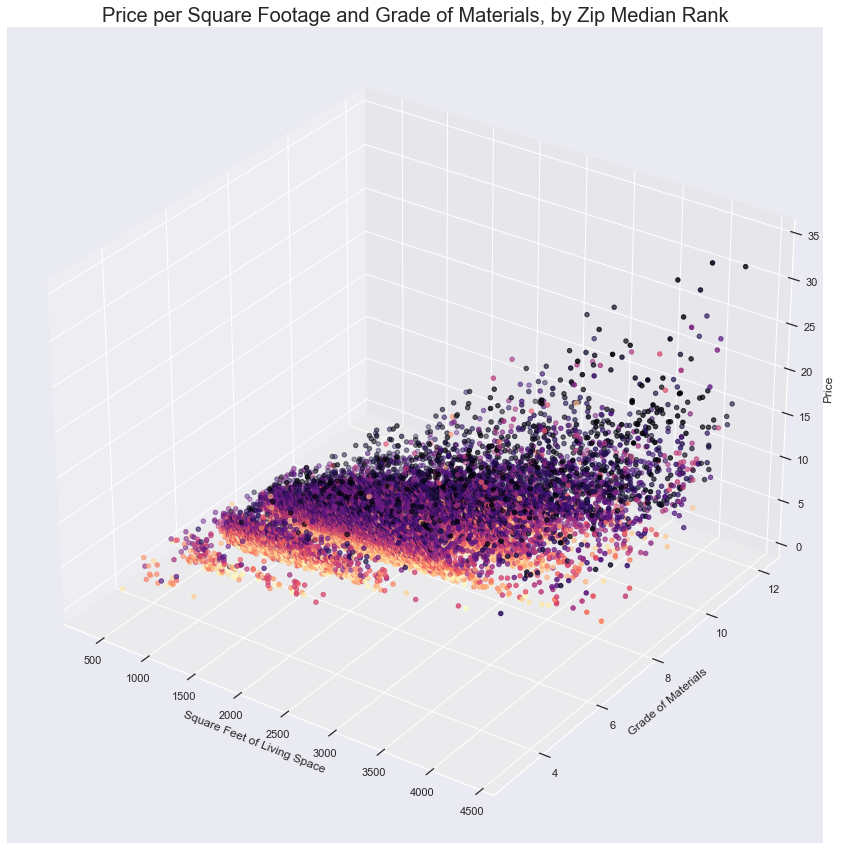

In [76]:
viz_y = viz_df['price']
viz_x = viz_df.drop('price', axis=1)

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(viz_sqft, viz_grade, viz_price, c=viz_zip, cmap='magma_r')
#ax.scatter(viz_sqft, viz_grade, viz_target, c='red', label="Predictions")
#ax.scatter(viz_sqft, viz_grade, end_z/100000, c='green', label="Actuals")

ax.set_xlabel('Square Feet of Living Space', fontsize=12)
ax.set_ylabel('Grade of Materials', fontsize=12)
ax.set_zlabel('Price', fontsize=12)

ax.set_title("Price per Square Footage and Grade of Materials, by Zip Median Rank", fontsize=20)

# first num is tilt angle, second num is turn angle
# default is about 30,305
# 0, 270 creates side view of pr/sqft
# 0, 360 creates side view of pr/grade
ax.view_init(30, 305)


# save visualization to png
#plt.savefig('price_per_grade.png');